## 계층적 군집
* 군집트리, 텐드로그램을 생성하여 다양한 데이터를 그룹화 
* 비슷한 군집끼리 묶어가며 최종적으로 하나의 군집단으로 묶는 기법
* 즉, 군집간의 거리를 기반으로 군집화하는 방식으로 기존의 군집기법(kmeans)에 비해 군집수를 지정할 필요 없음.

<img src='dendrogram.jpg'>

### 어제 배웠던 것을 설명하자면, 비계층적 군집. 중심점을 찍어놓고 그 중심점하고 거리를 재서 가까운 것끼리 묶어서 군집을 만드는 거라면, 

### 즉 계층적 군집은 유사한 군집끼리 묶어가면 최종적으로 하나의 군집단으로 묶는 기법이라는 것이다.

## 계층적 군집의 종류는 응집형, 분리형
 + 응집형 : 개별데이터 군집 => 군집단 형성
 + 분리형 : 데이터 전체를 하나의 군집 => 세부적으로 여러 군집으로 나눔>

In [2]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=fba37e5b3981b32caf25195e737ac647787ac9ac53430c9196223ccb6bb23a6a
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [4]:
import mglearn

ModuleNotFoundError: No module named 'mglearn'

In [5]:
mglearn.plots.plot_agglomerative_algorithm()

NameError: name 'mglearn' is not defined

#### 이 그림을 보자. 그림을 보면 유사한 군집도를 가진 점들 끼리 점진적으로 묶어나가는 것을 볼 수 있다.

In [6]:
## 기본 삼종셋트

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

from sklearn.metrics import silhouette_score


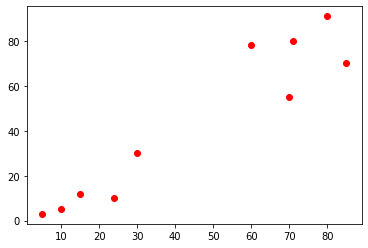

In [7]:
## 덴드로그램 시각화

X = np.array([ [5,3], [10,5], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91] ])
plt.plot(X[:,0], X[:, 1], 'ro')

### 덴드로그램 시각화를 해보았다. 양 쪽으로 묶일 것을 확인할 수 있다. 이것이 바로 응집형 군집 시각화라는 것이다.

## 덴드로그램 작동원리
* linkage 함수의 method 속성으로 각 군집간의 연결방식을 지정
 => single/average/complete/centeroid/ward
* 단일 single : 각 군집을 대상으로 최소거리 기준 (가까운 것부터 군집)
* 평균 average : 각 군집을 대상으로 평균리 기준
* 최대 complete : 각 군집을 대상으로 최대거리 기준 (먼 것 부터 군집)
* 중심 centeroid : 각 군집내 중심점 기준
* 와드 ward : 군집간 SSW(응집도), SSB(분리도)간의 차이를 이용

<img src='linkage.jpg'>

### orientation : 덴드로그램 그래프 출력 방향.
### distance_sort : 군집간 거리 출력순서 (큰 녀석->작은녀석 순으로 출력됨.)
### show_leaf_counts :

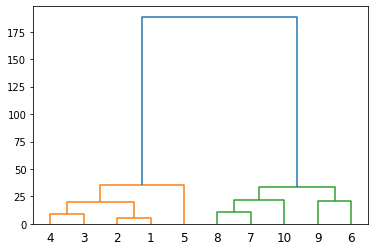

In [8]:
# linkage(객체, method = 거리계산법)

linked = linkage(X, method='ward')

#
dendrogram(linked, orientation='top', labels=range(1,11), distance_sort='descending',
           show_leaf_counts=True)
plt.show()

### distance_sort는 숫자의 순서가 바뀌어서 나온다. 'descending'을 넣어주는게 보기가 편할 것이다.
 + 125를 기준으로 했을때 군집이 몇개 만들어지는가? 2개. 
 + 25를 기준으로 했을때 군집이 몇개 만들어지는가? 4개. 이런 식으로 이 그래프를 분석하면 된다.

## 군집을 나눌때 적절한 거리 distance는?
 * 덴드로그램을 보고 n개의 군집을 나눌려고 할때 적절한 y축값은?
 * 덴드로그램에서는 밑에서 위로 올라갈수록 군집을 의미하는 선의 갯수가 줄어듬. (응집형 군집)
 * spicy에서는 fcluster함수를 이용해서 distance가 특정값일때 군집정보를 알려줌.

#### 사용방법 - fcluster(연결방식, 거리, 거리측정방식) 이렇게 지정해서 쓰면 된다.
 + clusters = fcluster(linked, 20, criterion='distance')
 + nc = np.unique(clusters)
 + np.count_nonzero(nc)

In [9]:
clusters = fcluster(linked, 20, criterion='distance')
clusters

array([5, 5, 5, 5, 6, 1, 3, 3, 2, 4], dtype=int32)

In [10]:
nc = np.unique(clusters)
np.count_nonzero(nc)

6

## np.cpint_nonzero = >로 세보면 총 군집의 갯수를 셀 수 있다. 

In [11]:
clusters = fcluster(linked, 30, criterion='distance')
clusters

array([3, 3, 3, 3, 4, 1, 2, 2, 1, 2], dtype=int32)

In [12]:
nc = np.unique(clusters)
np.count_nonzero(nc)

4

In [13]:
## sklearn으로 응집형 군집 실시 
## * AgglomerativeClustering 패키지 사용 

from sklearn.cluster import AgglomerativeClustering

In [14]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
cluster.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

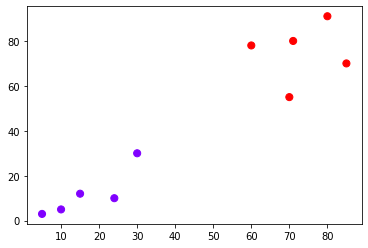

In [15]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, s=50, cmap='rainbow')

In [16]:
from sklearn.datasets import load_iris

In [17]:
# iris 데이터를 로드하고, 데이터와 타겟을 지정하는 과정.

iris = load_iris()
X= iris.data
y= iris.target

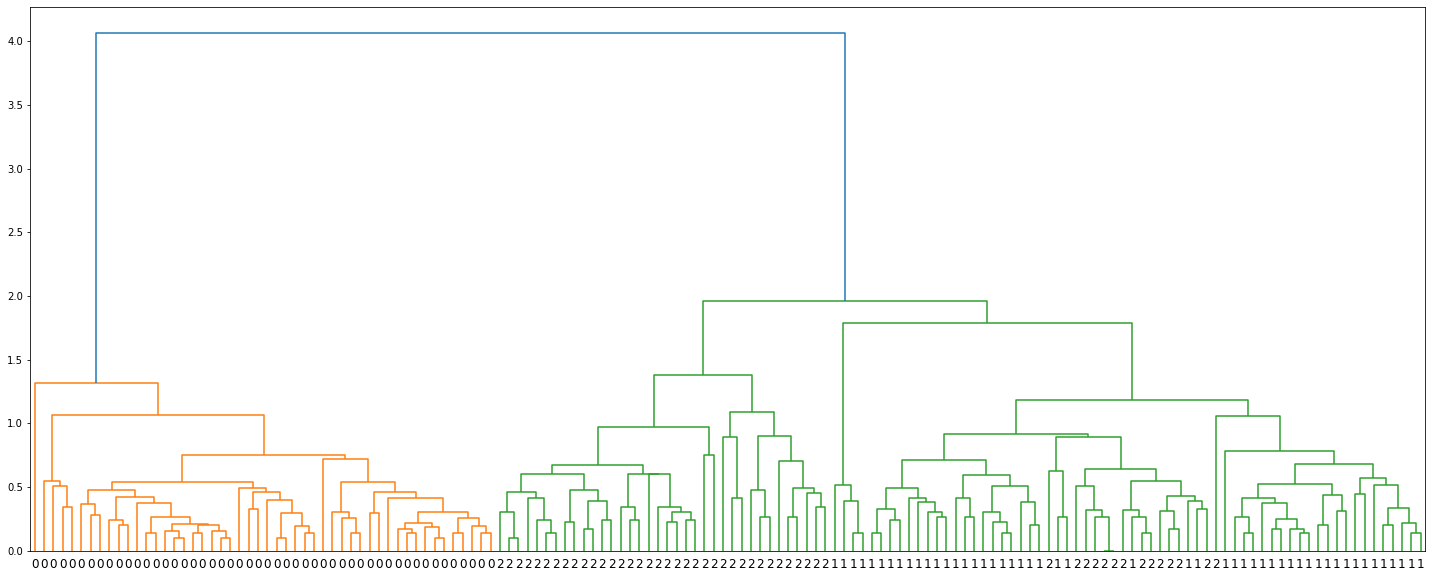

In [18]:
# 응집형 군집 1 만듬.

linked = linkage(X, method='average')
plt.figure(figsize=(25,10))
dendrogram(linked, labels=y, 
           leaf_rotation=0,
           leaf_font_size=12)
plt.show()

## 실습. iris 데이터 셋을 응집형 군집으로 나누어서 해보자 1
* 군집간 연결방식은 : average, ward
* 각 개별적으로 덴드로그램 시각화


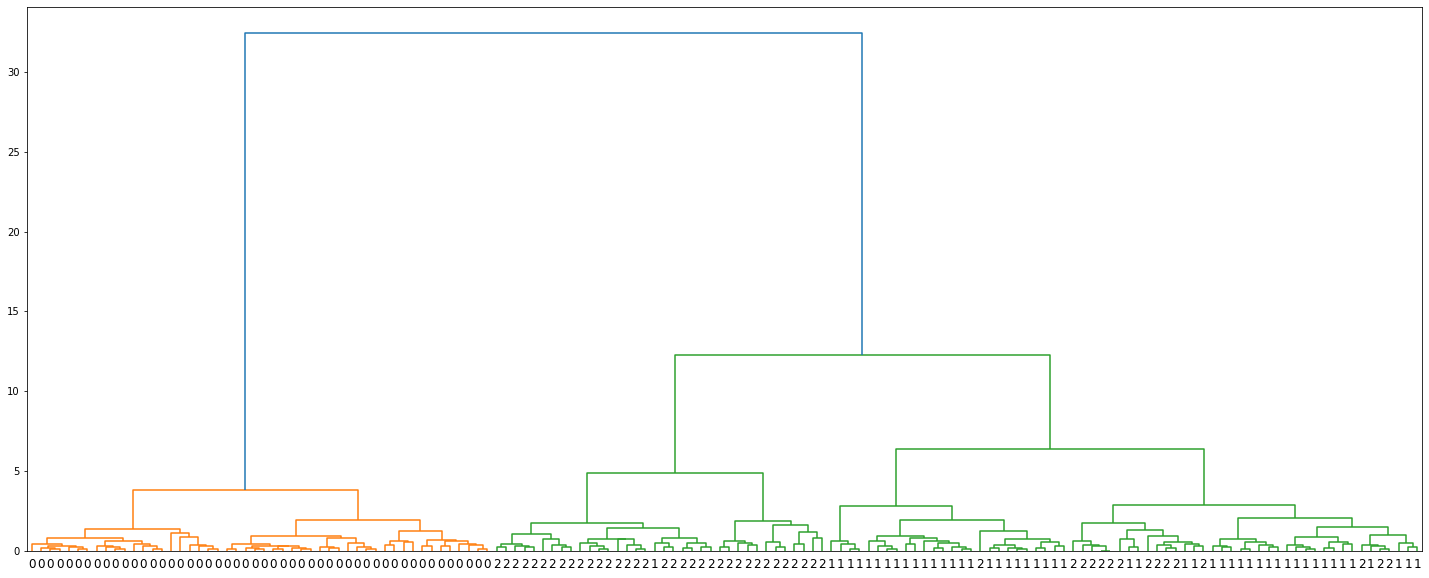

In [19]:
# 응집형 군집 2 만듬. (ward)

linked = linkage(X, method='ward')
plt.figure(figsize=(25,10))
dendrogram(linked, labels=y, 
           leaf_rotation=0,
           leaf_font_size=12)
plt.show()

In [20]:
# 3개의 군집으로 나눌때 적절한 DISTANCE는?  = average 
fcluster(linked, 1.8, criterion='distance')

## iris 데이터 셋을 응집형 군집으로 나눠봄 2
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(X)
cluster.labels_
silhouette_score(X, cluster.labels_)

0.5541608580282847

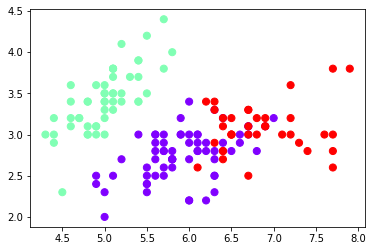

In [21]:
plt.scatter(X[:, 0], X[:, 1],c=cluster.labels_, s=50, cmap='rainbow')

In [22]:
## iris 데이터 셋을 응집형 군집으로 나눠봄 2 = ward
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
cluster.labels_
silhouette_score(X, cluster.labels_)

0.5543236611296415

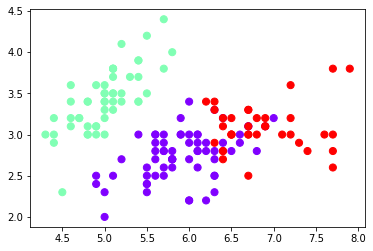

In [23]:
plt.scatter(X[:, 0], X[:, 1],c=cluster.labels_, s=50, cmap='rainbow')

In [24]:
## 실루엣 그래프로 적절한 군집수 확인

from sklearn.datasets import make_blobs

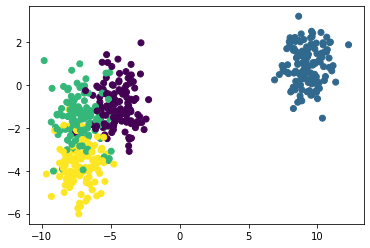

In [25]:
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=2111161155)
plt.scatter(X[:,0], X[:,1], c=y )

In [26]:
## 클러스터 갯수를 2~4일때 실루엣계수를 시각화.
import mldlpy4

# visualize_silhouette(군집수, 대상객체)


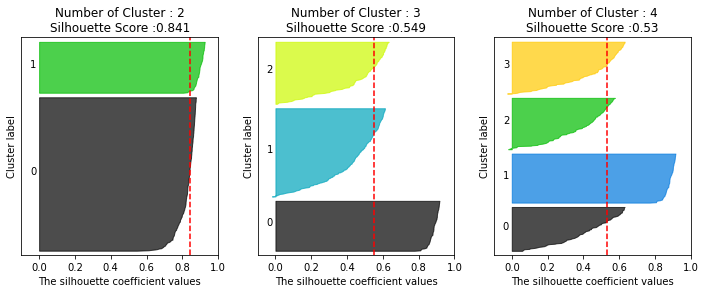

In [27]:
mldlpy4.visualize_silhouette([2,3,4], X)

## 응집도가 높은 경우는 크게 벌어져있고, 낮은 경우는 그 반대.

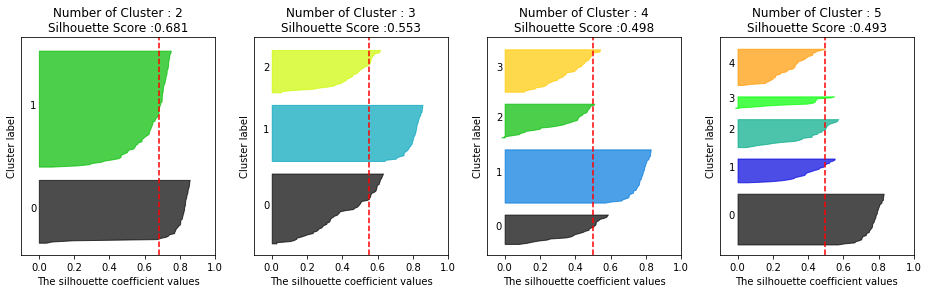

In [28]:
mldlpy4.visualize_silhouette([2,3,4,5], iris.data)

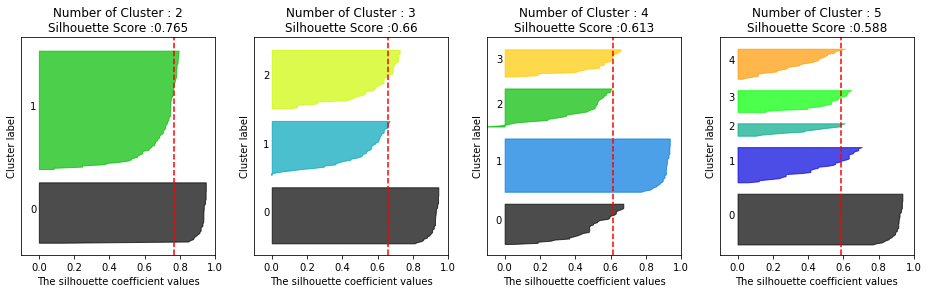

In [29]:
mldlpy4.visualize_silhouette([2,3,4,5], iris.data[:, 2:4])

### 학생성적과 집중도를 기준으로 클래스를 나눌려고 할 떄
### 몇 개의 반으로 나누는 것이 좋을지
### 텐드로그램으로 시각화해보세요 (연결방식 : average)

In [30]:
## 파일 로드 및 덴드로그램 그리기.

ac = pd.read_csv('academy.csv', encoding='euc-kr')

X = ac.iloc[:, 1:]

linked = linkage(X, method='average')

# 영어 컬럼 빼고 나머지 다 불러오기.

linked[:5]

array([[30.        , 51.        ,  4.12310563,  2.        ],
       [37.        , 41.        ,  4.79583152,  2.        ],
       [18.        , 19.        ,  7.        ,  2.        ],
       [23.        , 47.        ,  7.07106781,  2.        ],
       [ 0.        , 14.        ,  7.28010989,  2.        ]])

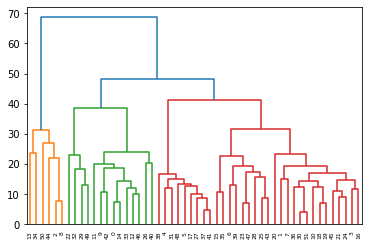

In [31]:
dendrogram(linked)
plt.show()

## 이렇게 나오는데 글자가 작아서 잘 안보이죠? 키워야죠 그럼.

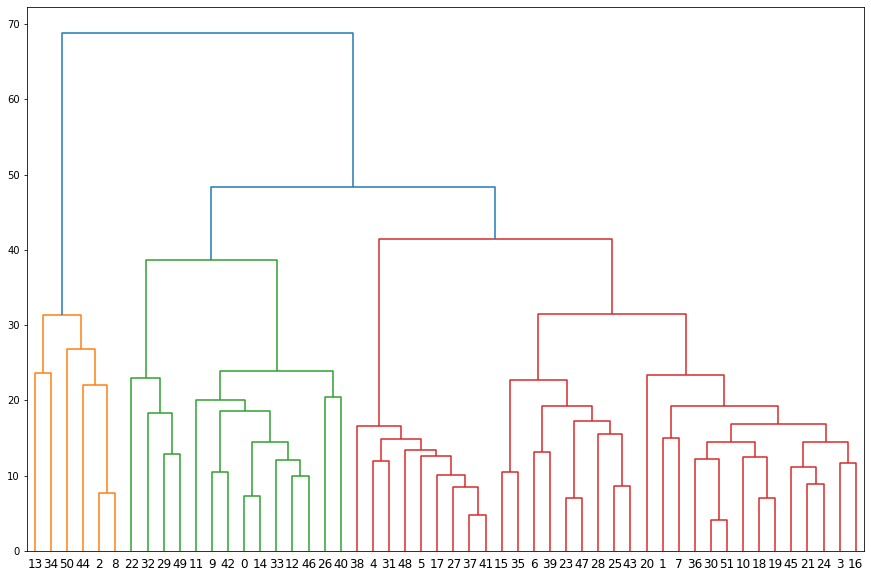

In [32]:
plt.figure(figsize=(15,10))
dendrogram(linked, leaf_rotation=0, leaf_font_size=12)
plt.show()

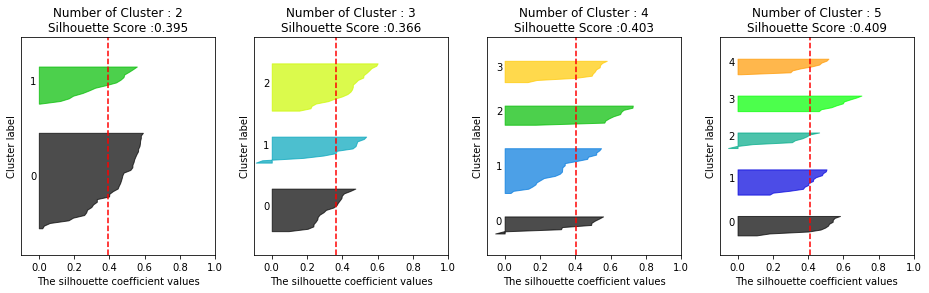

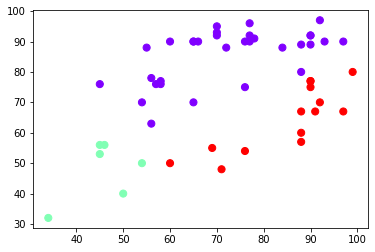

In [33]:
# 군집갯수별 실루엣계수 확인.

mldlpy4.visualize_silhouette([2,3,4,5], X)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(X)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, s=50, cmap='rainbow')

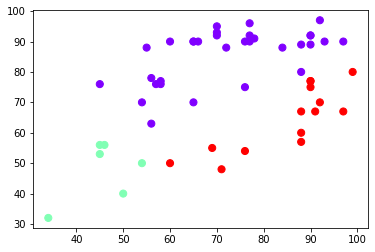

In [34]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(X)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, s=50, cmap='rainbow')

## ggplot2에서 제공하는 다이아몬드 데이터셋을 이용해서 군집분석 실시.
* 가격 캐럿수, 깊이, 테이블만 추출해서 군집 수행.



In [35]:
## 파일 로드 및 덴드로그램 그리기.

dm = pd.read_csv('diamonds.csv', encoding='euc-kr')
dm.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
dm.info() # info로 총 정보를 파악한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [37]:
# 변수를 만들기. 원하는 컬럼 목록을 가져오기. 근데 데이터가 많아서 시각화를 하기가 좀 그렇다.
# 적절한 최적에 군집 수를 일단 뽑아본다.

d = dm.iloc[:, [6,0,4,5]]

In [38]:
### 기존 분류(군집) 결과 
dm.cut.value_counts() # cut으로 value_counts()를 했을때 5가지 나온다.
dm.color.value_counts() # color로 분류 : 7가지
dm.clarity.value_counts() # clarity로 분류 : 8까지

# 여기서 많아봐야 5~8가지 정도밖에 안나온다는 걸 확인했다.

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

## 여기서 많아봐야 5~8가지 정도밖에 안나온다는 걸 확인했다.

In [39]:
kms = KMeans(n_clusters=k, max_iter=100, random_state=2111151445)
kms.fit(d)
    ss = silhouette_score(d, kms.labels_, metric='euclidean')
    sss.append(ss)
    els.append(kms.inertia_)
plt.plot(range(4,10+1), ss, 'ro-')
plt.plot(range(4,10+1), els, 'ro-')

IndentationError: unexpected indent (Temp/ipykernel_6796/753715856.py, line 3)

In [ ]:
# 군집이 6개일때 

kms = KMeans(n_clusters=6, max_iter=1000, random_state=2111151445)
     
kms.fit(d)

# 시각화 : 가격, 캐럿수, 깊이, 테이블
c = ['red', 'blue', 'green', 'pink', 'navy', 'purple']
for i in range(6):
    plt.scatter(d.iloc[kms.labels_ == i,0],
            d.iloc[kms.labels_ == i,1],
            c = c[i], s=50, marker= 'o')

In [ ]:
# 군집이 7개일때 

kms = KMeans(n_clusters=7, max_iter=1000, random_state=2111151445)
     
kms.fit(d)

# 시각화 : 가격, 캐럿수, 깊이, 테이블
c = ['red', 'blue', 'green', 'pink', 'navy', 'purple', 'yellow']
for i in range(6):
    plt.scatter(d.iloc[kms.labels_ == i,0],
            d.iloc[kms.labels_ == i,1],
            c = c[i], s=50, marker= 'o')

In [ ]:
# 군집이 4개일때 

kms = KMeans(n_clusters=4, max_iter=1000, random_state=2111151445)
     
kms.fit(d)

# 시각화 : 가격, 캐럿수, 깊이, 테이블
c = ['red', 'blue', 'green', 'pink']
for i in range(4):
    plt.scatter(d.iloc[kms.labels_ == i,0],
            d.iloc[kms.labels_ == i,1],
            c = c[i], s=50, marker= 'o')

In [ ]:
## 응집형 군집 -> 메모리 부족으로 시각화 실패.

## linked = linkage(d, method='average')
## dendrogram(linked, leaf_roataion=0, leaf_font_size=12)

In [ ]:
## 응집형 군집 -> 메모리 부족으로 시각화 실패.

mldlpy4.visualize_silhouette([4,5,6,7,8,9,10], d)